<a href="https://colab.research.google.com/github/kevinegan31/Data-Science-Projects/blob/main/Engineering_Graduate_Salary/Engineering_Graduate_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('Engineering_graduate_salary.csv')
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [3]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

# Drop columns that should not affect salaries.

In [4]:
df = df.drop(['ID', 'DOB', 'CollegeID', '12graduation',
              'GraduationYear', '10board', '12board',
              'CollegeState', 'CollegeCityID', 'CollegeCityTier'],
             axis=1)
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Check specialization column
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

Column shows us that there are lots of single values which can unnecessarily affect the model if we try to train this data (the data will develop many factors for the column).

In [7]:
specialization = df.Specialization.value_counts() #Store the values # in specialization
lessthan10 = specialization[specialization<=10]
lessthan10
def correctSpecialization(specialization):
    if specialization in lessthan10:
        return 'Other'
    else:
        return specialization


In [8]:
df['Specialization'] = df['Specialization'].apply(correctSpecialization)
df['Specialization'].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
Other                                           76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

In [9]:
# Check the statistics on the updated data frame
df.describe() #Understand the statistics of given data.

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


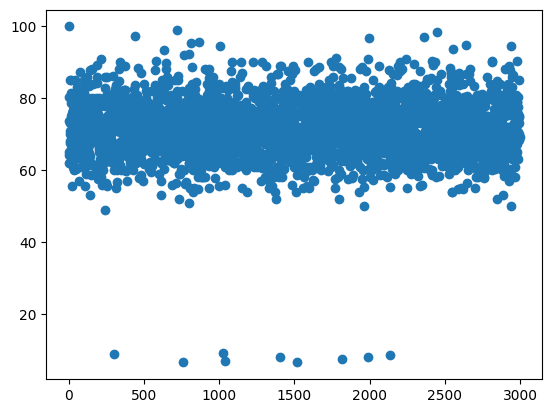

In [10]:
# Analyze College GPA
plt.scatter(df.index,df['collegeGPA'])

In [11]:
# Remove GPA below 40
df = df[(df['collegeGPA'] > 40)]

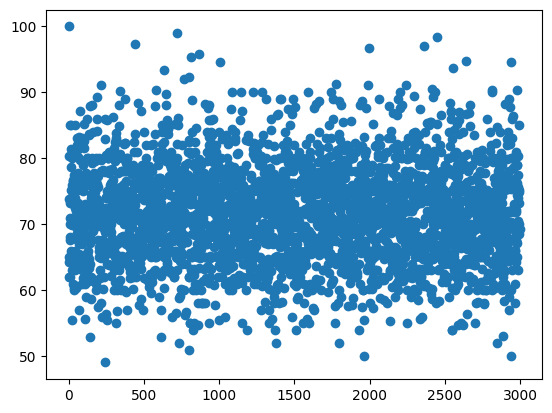

In [12]:
plt.scatter(df.index,df['collegeGPA'])

In [13]:
df.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

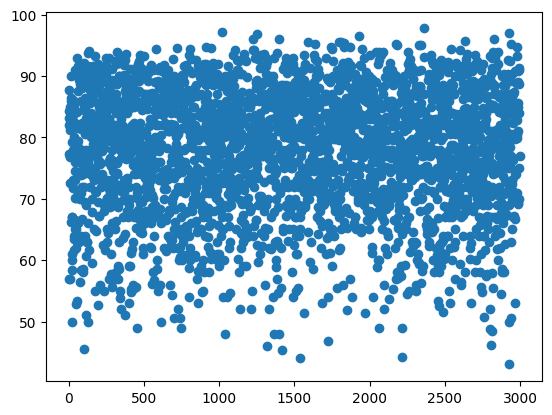

In [14]:
# Analyze 10percentage
plt.scatter(df.index,df['10percentage'])

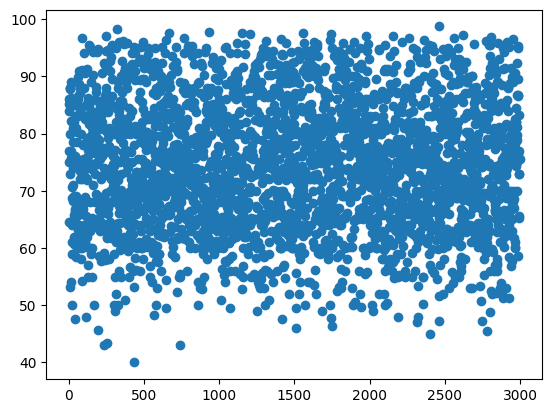

In [15]:
# Analyze 12percentage
plt.scatter(df.index,df['12percentage'])

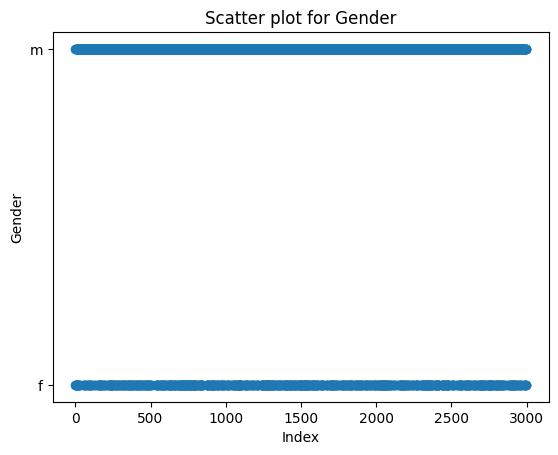

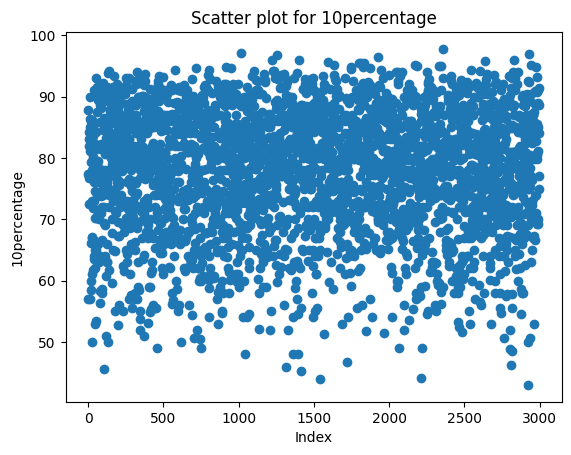

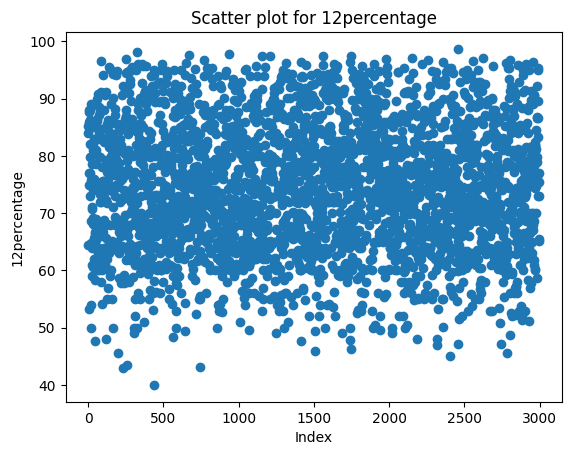

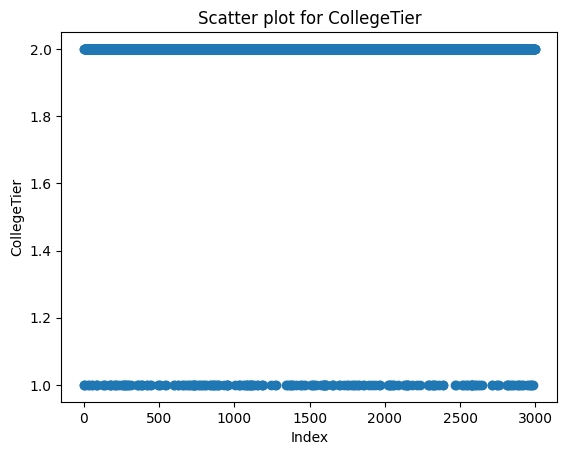

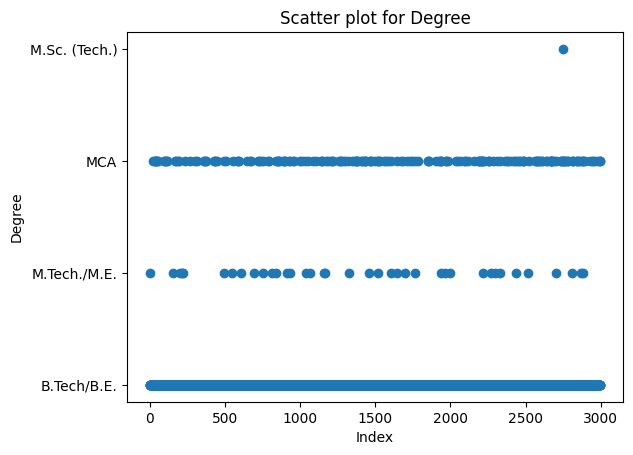

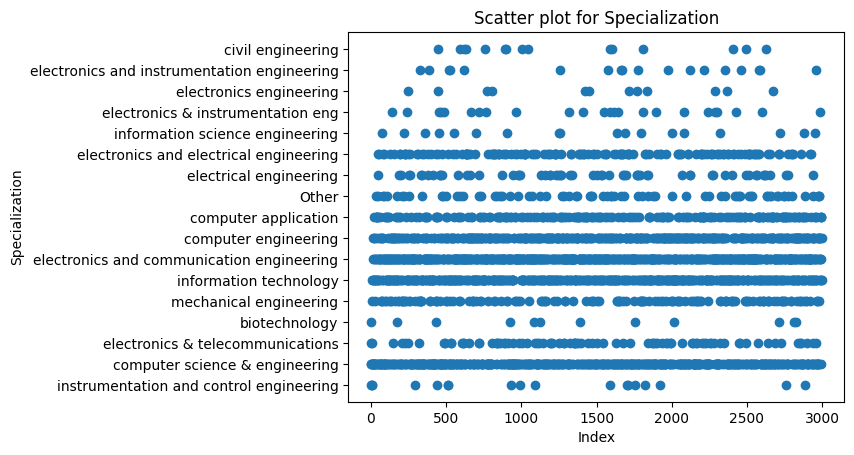

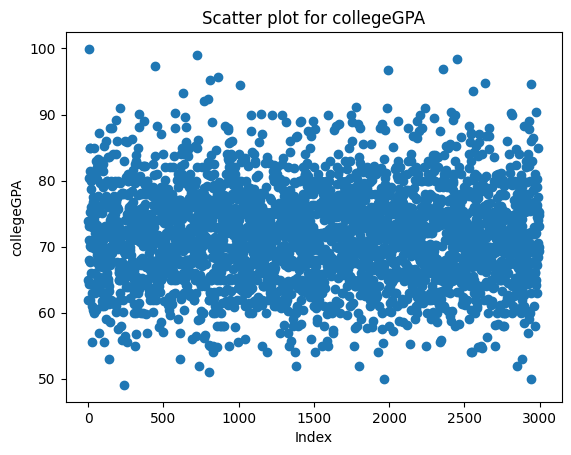

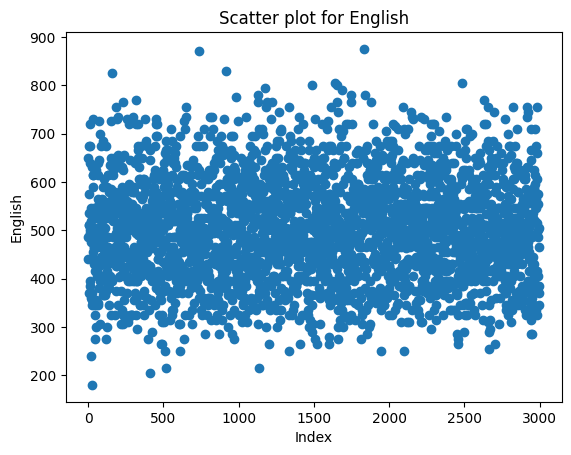

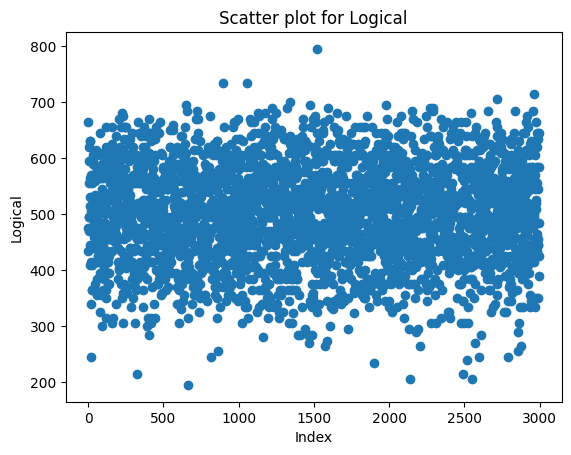

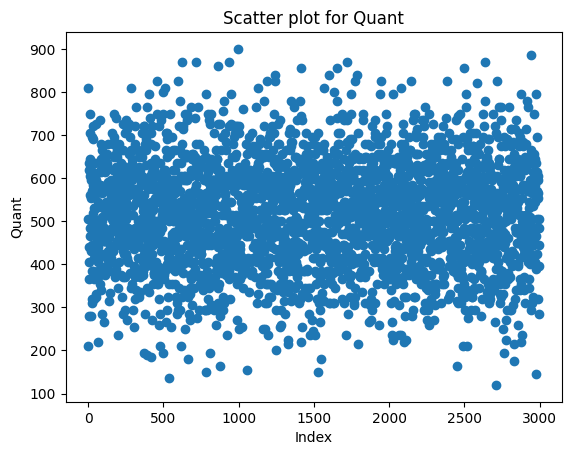

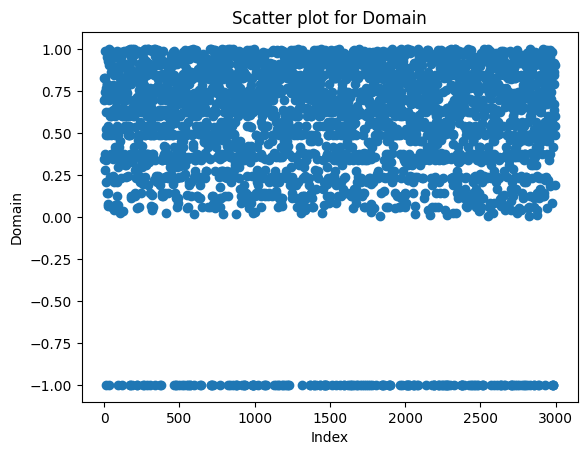

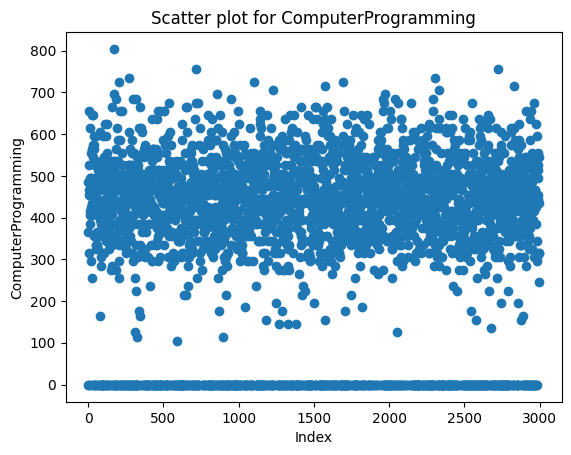

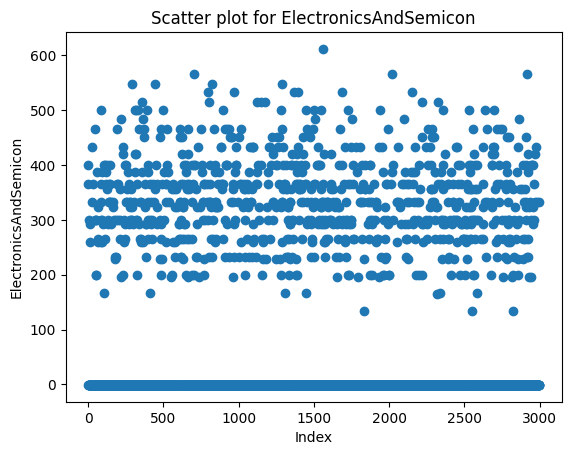

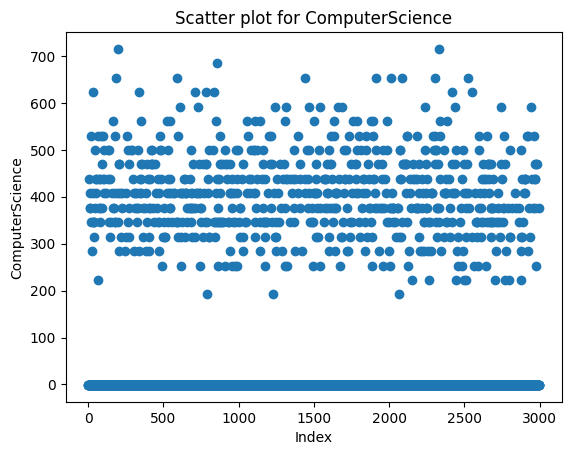

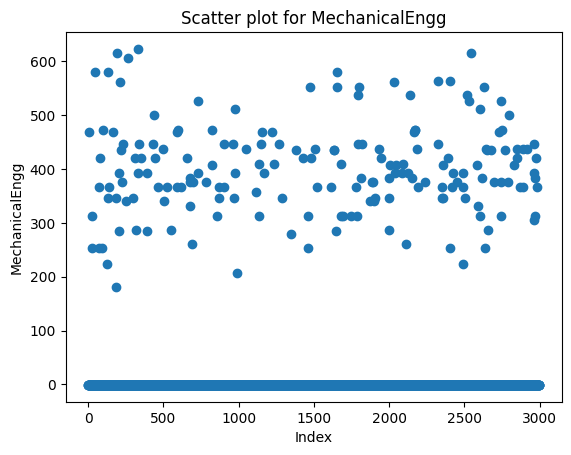

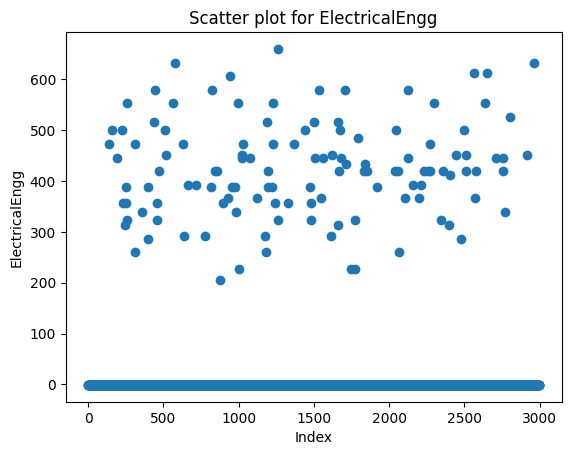

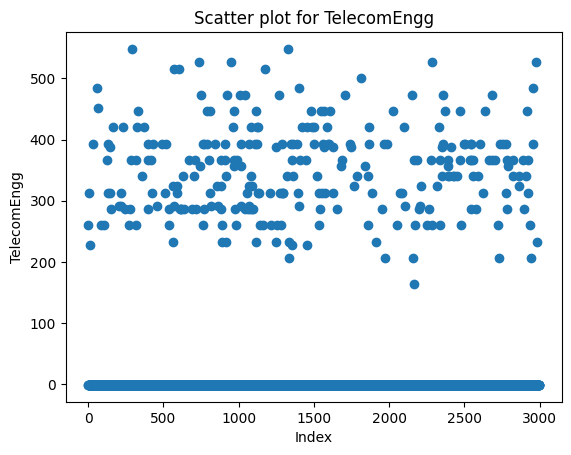

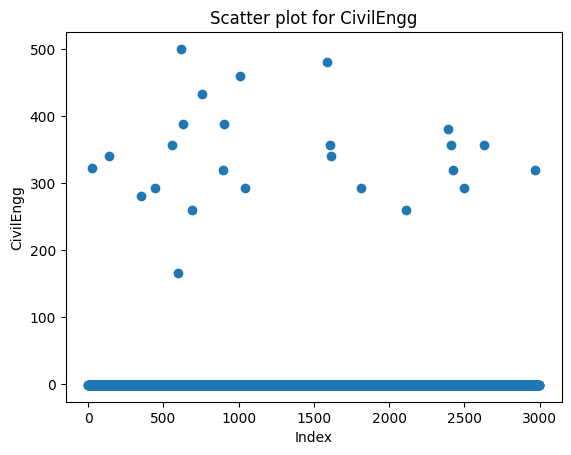

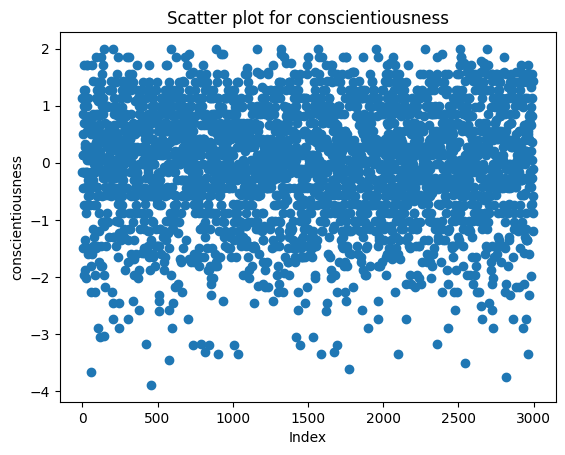

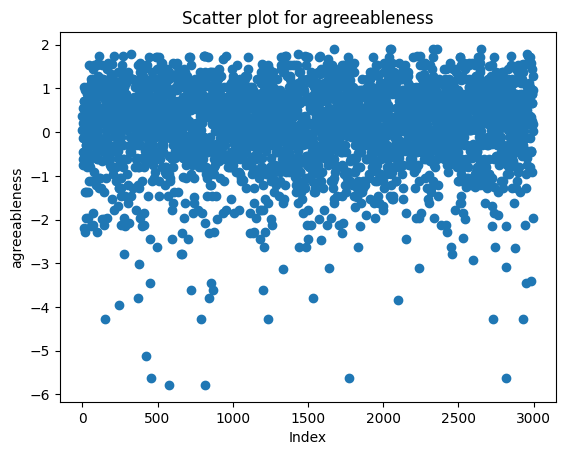

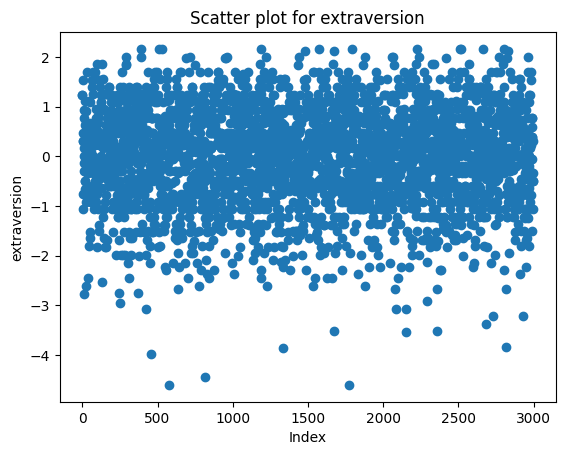

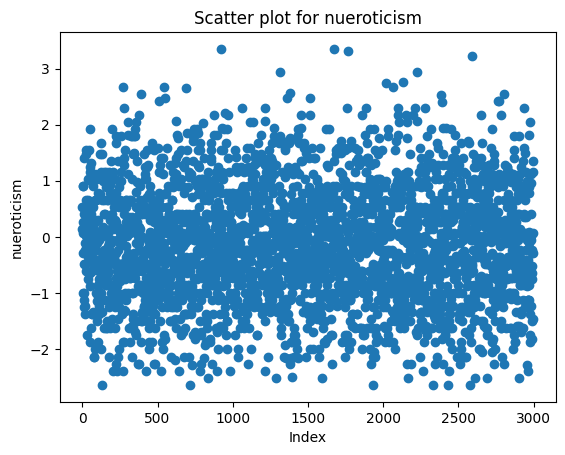

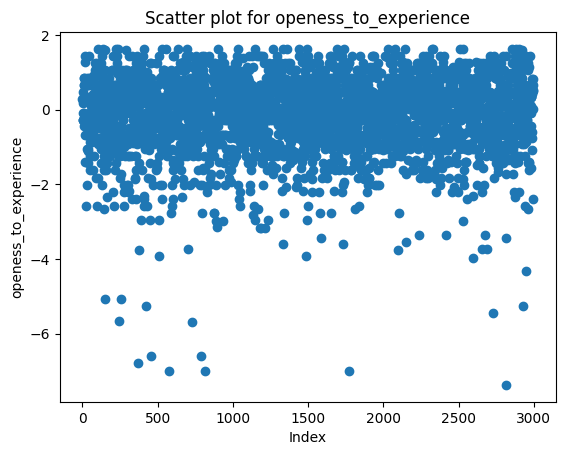

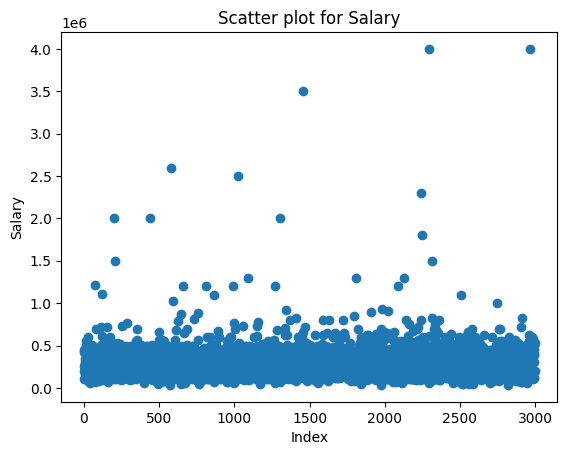

In [16]:
for i in df.columns:
    plt.figure() # create a new figure
    plt.scatter(df.index, df[i])
    plt.title(f'Scatter plot for {i}')
    plt.xlabel('Index')
    plt.ylabel(i)
    plt.show() # show the plot

In [17]:
# I’ve replaced the -1 values with nan first then replaced
# all those with the mean values of those columns.
df = df.replace(-1,np.nan)
cols_with_nan = [col for col in df.columns if df.isna().sum()[col]>0]
for col in cols_with_nan:
    df[col] = df[col].fillna(df[col].mean())

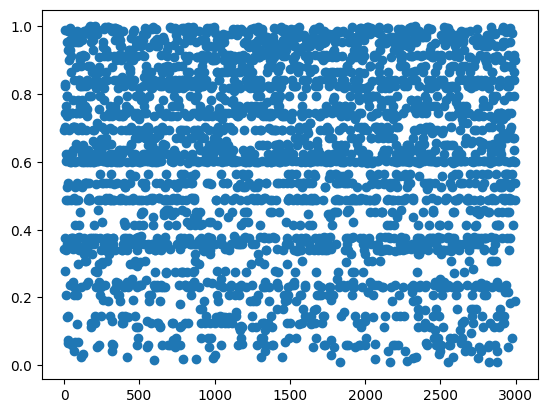

In [18]:
plt.scatter(df.index,df['Domain'])

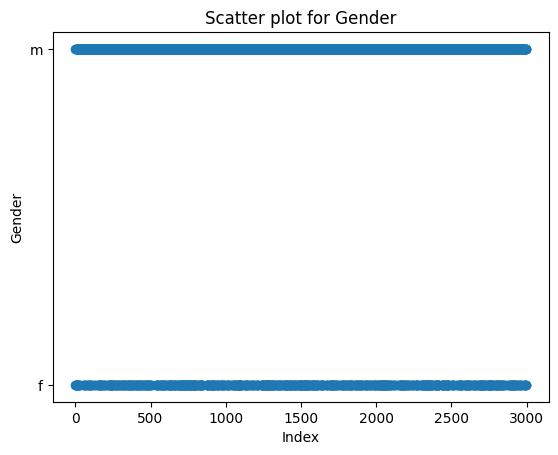

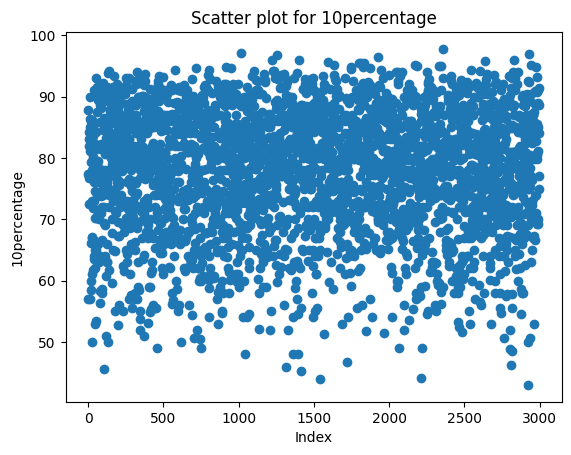

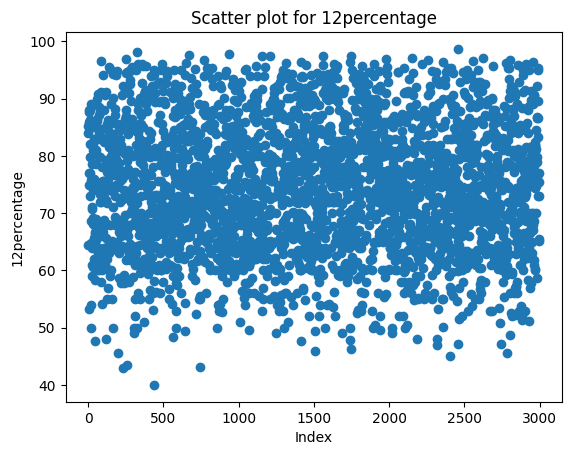

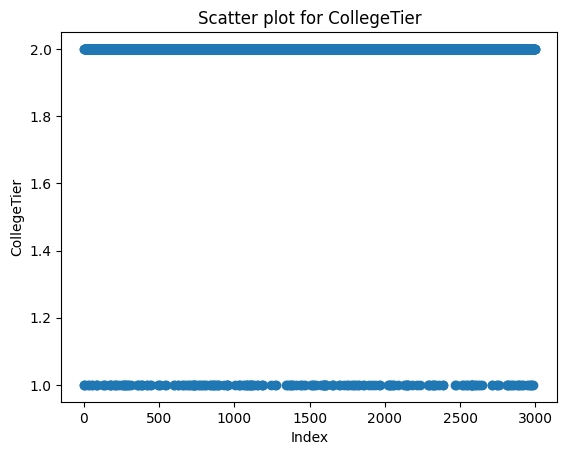

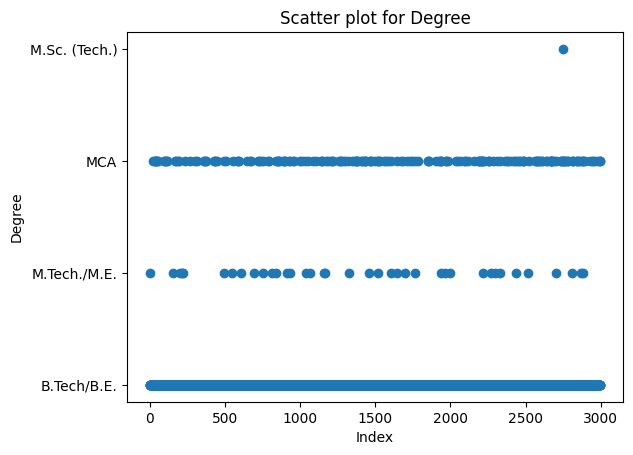

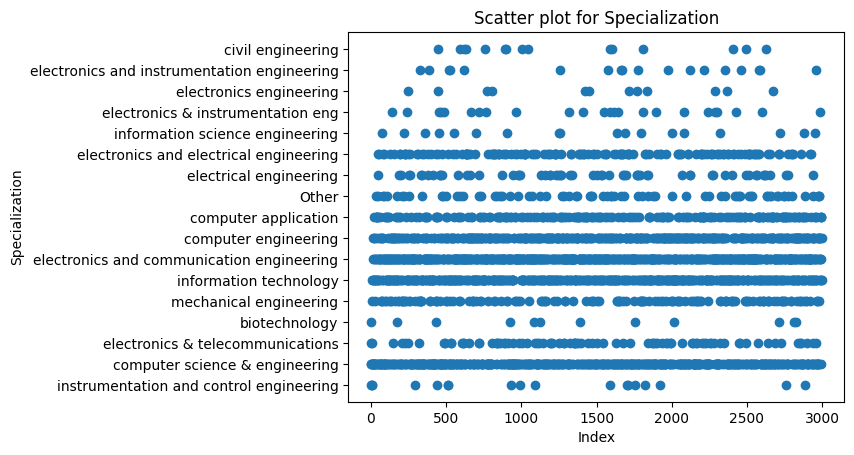

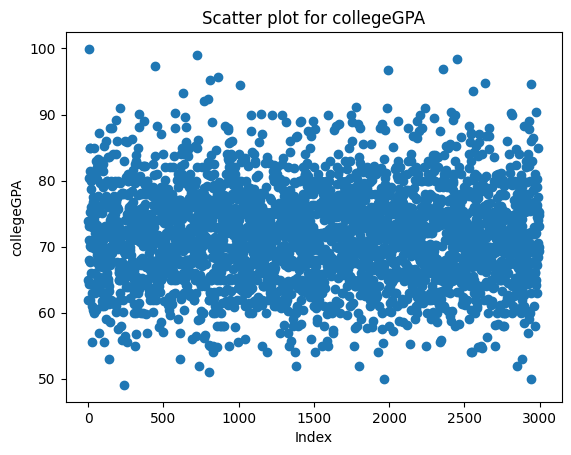

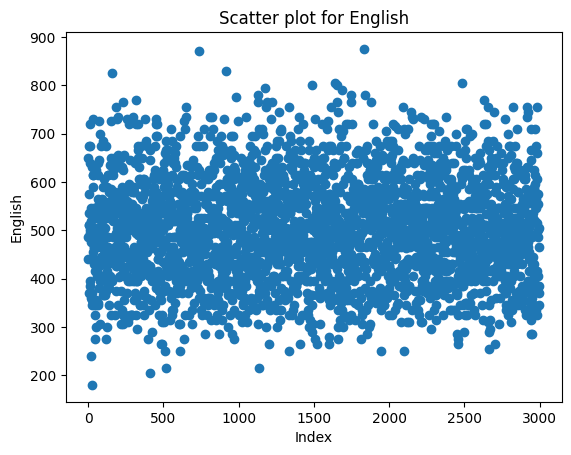

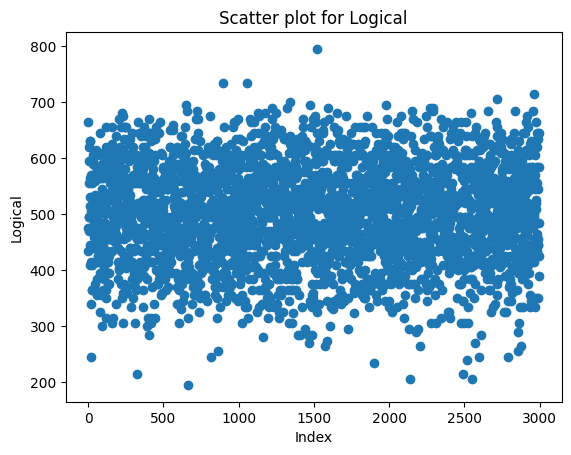

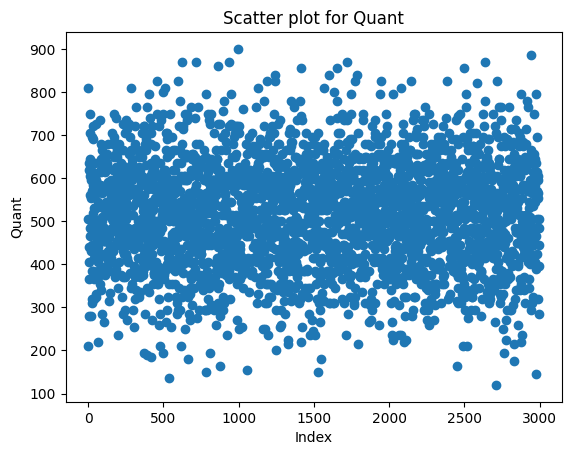

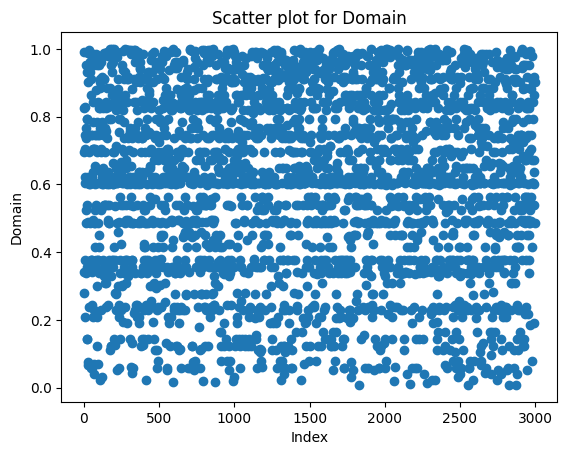

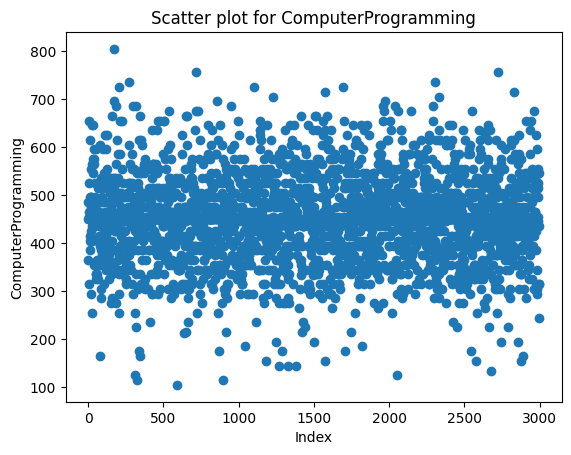

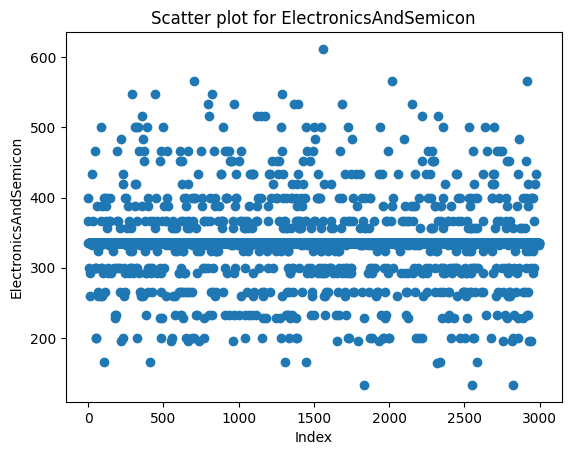

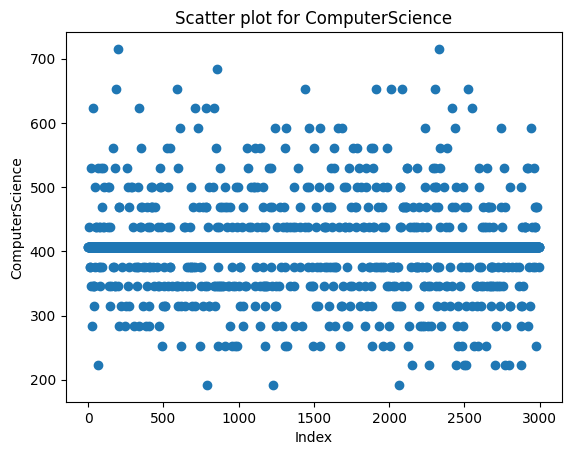

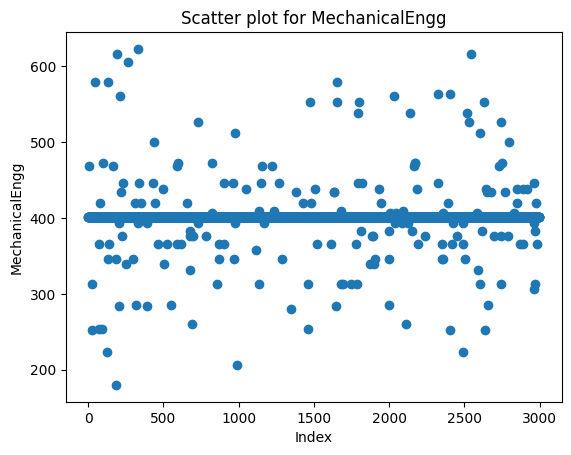

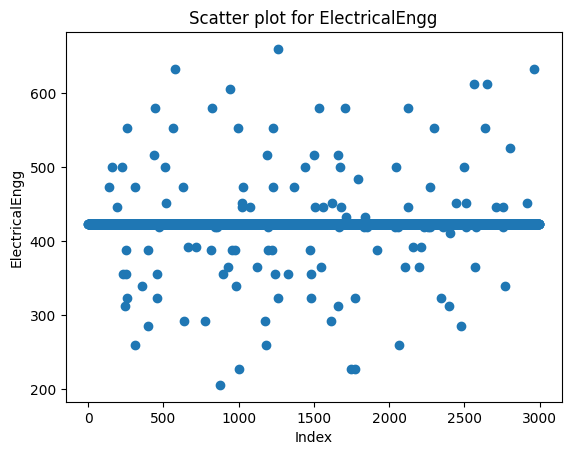

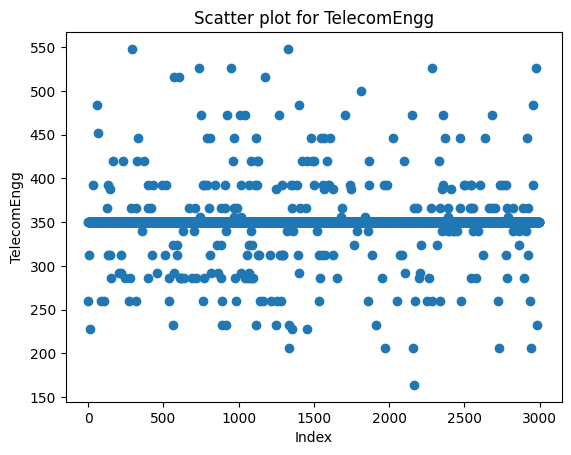

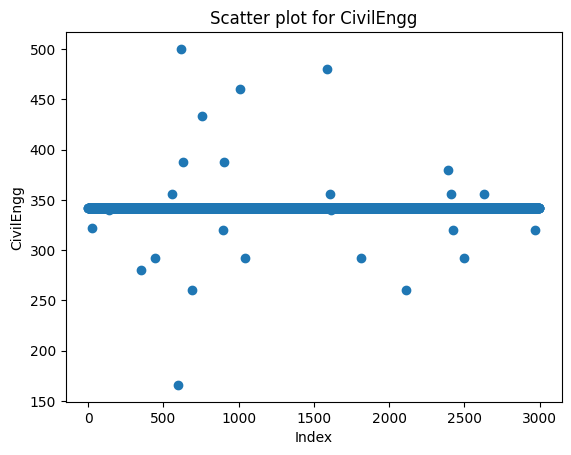

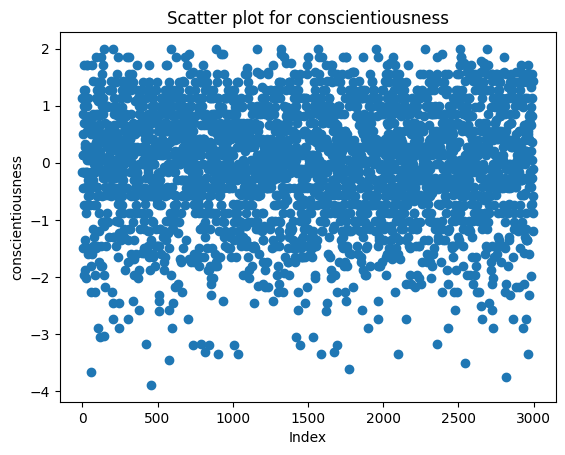

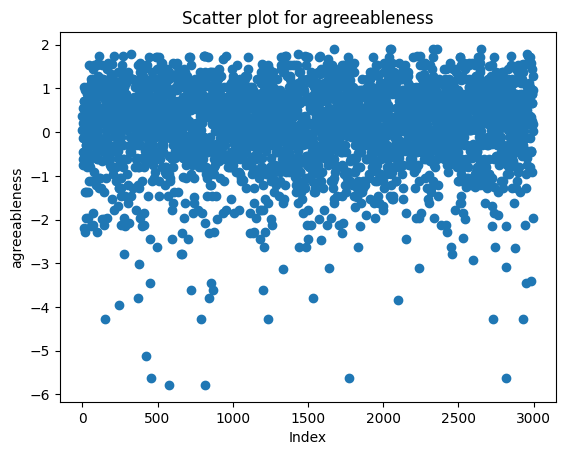

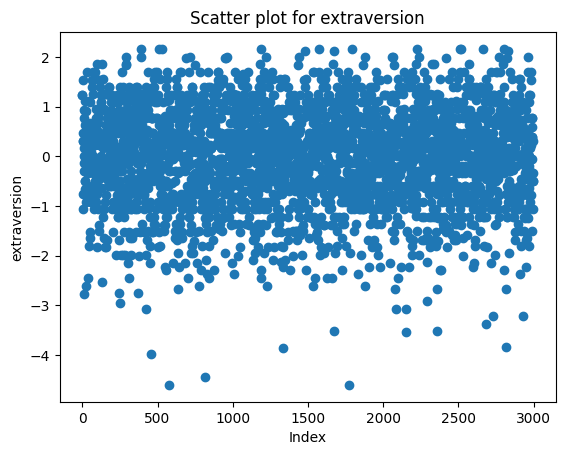

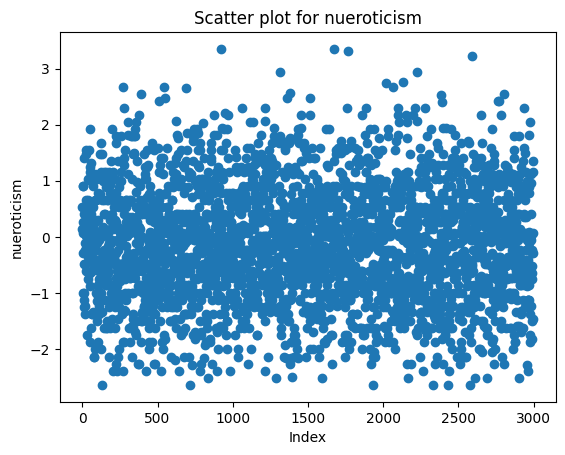

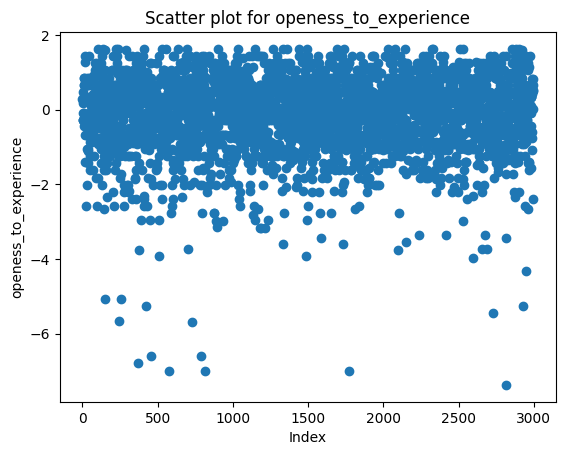

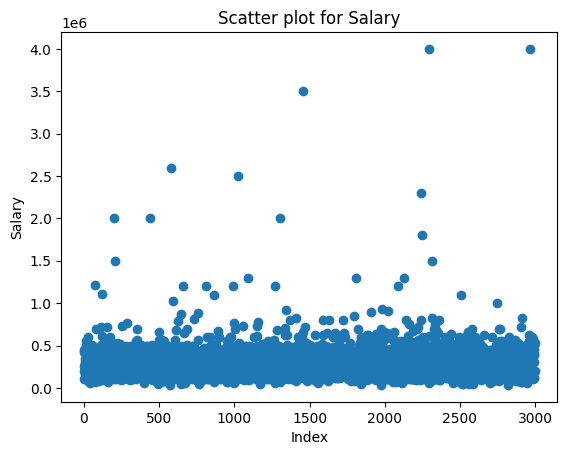

In [19]:
for i in df.columns:
    plt.figure() # create a new figure
    plt.scatter(df.index, df[i])
    plt.title(f'Scatter plot for {i}')
    plt.xlabel('Index')
    plt.ylabel(i)
    plt.show() # show the plot

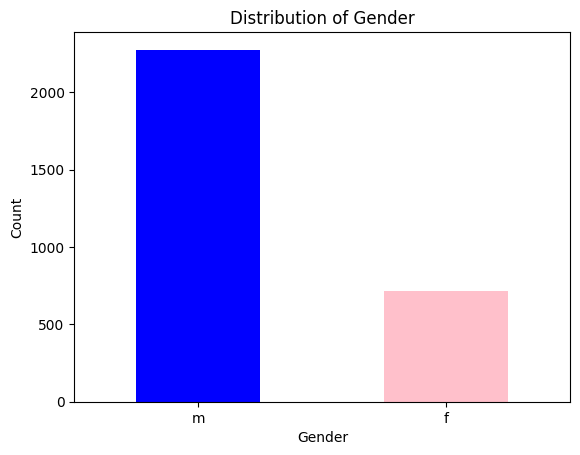

In [20]:
gender_counts = df['Gender'].value_counts()

gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks(rotation=0)  # Rotate x-axis labels by 90 degrees
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

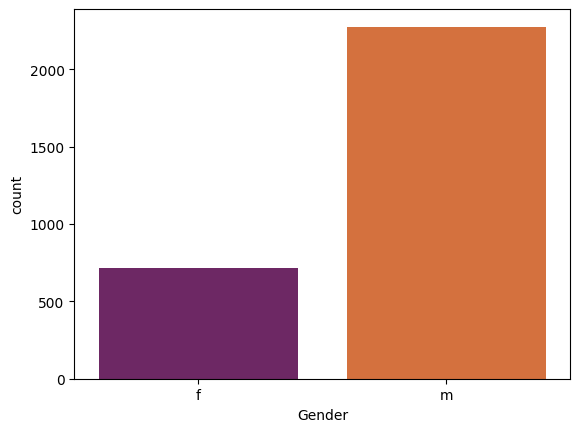

In [21]:
sns.countplot(x='Gender', data=df, palette='inferno')

<Axes: xlabel='10percentage', ylabel='12percentage'>

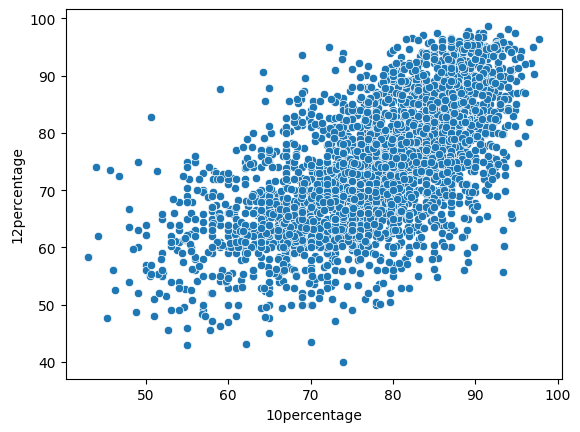

In [22]:
# Clear linear relationship between 10th and 12th percentage
sns.scatterplot(x='10percentage', y='12percentage', data=df)

In [23]:
df.drop(['10percentage'],axis=1,inplace=True)

In [24]:
df.columns

Index(['Gender', '12percentage', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

<Axes: xlabel='collegeGPA', ylabel='Salary'>

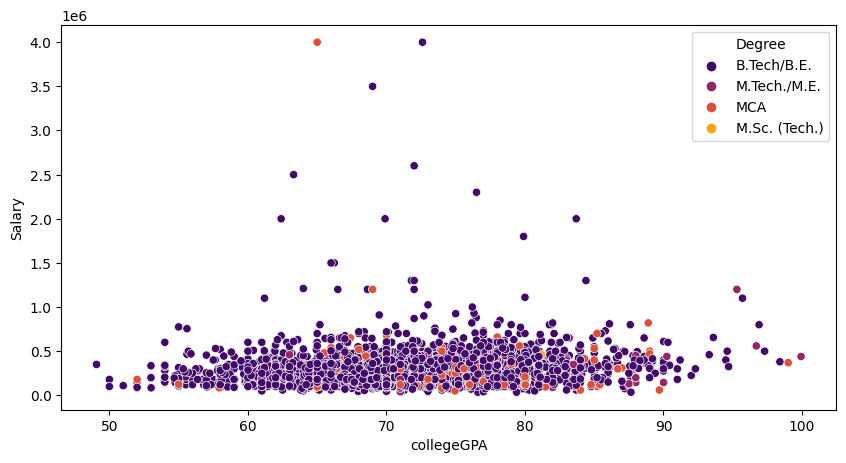

In [25]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='collegeGPA',y='Salary', data=df,
                hue = 'Degree',palette = 'inferno')

<Axes: xlabel='openess_to_experience', ylabel='Salary'>

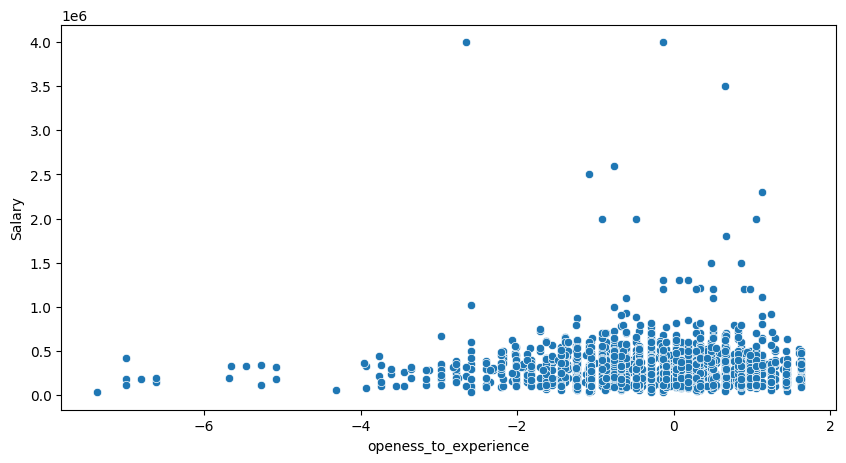

In [26]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='openess_to_experience',
                y='Salary',
                data=df)

In [27]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989 entries, 0 to 2997
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2989 non-null   object 
 1   12percentage           2989 non-null   float64
 2   CollegeTier            2989 non-null   int64  
 3   Degree                 2989 non-null   object 
 4   Specialization         2989 non-null   object 
 5   collegeGPA             2989 non-null   float64
 6   English                2989 non-null   int64  
 7   Logical                2989 non-null   int64  
 8   Quant                  2989 non-null   int64  
 9   Domain                 2989 non-null   float64
 10  ComputerProgramming    2989 non-null   float64
 11  ElectronicsAndSemicon  2989 non-null   float64
 12  ComputerScience        2989 non-null   float64
 13  MechanicalEngg         2989 non-null   float64
 14  ElectricalEngg         2989 non-null   float64
 15  Tele

In [28]:
# Gender, degree, specialization need to be processed as they
# are of type ‘object’ not suitable for ML model input.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

In [29]:
df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,84.00,1,0,15,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,64.50,2,0,5,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,85.17,2,0,8,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,86.00,1,0,5,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,75.00,2,0,1,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [31]:
from sklearn.preprocessing import StandardScaler

# define your data and target
X = df.drop('Salary', axis=1)
y = df['Salary']

sc = StandardScaler()
X = sc.fit_transform(X)


In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)  # 20% of the data is used for testing
# Instantiate the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')  # default objective function for regression in XGBoost

# define cross-validation method
cv = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

# Perform cross-validation on the training data
scores = cross_val_score(xgb_reg, X_train, y_train, cv=cv,
                         scoring='neg_mean_squared_error')

# The scoring function is the negative mean squared error.
# We use negative as sklearn's cross_val_score considers
# the utility function (the higher the better),
# while we generally want to minimize the error (the lower the better).

# convert scores to positive
scores = -scores

# print out the mean and standard deviation of the scores
print("Mean MSE during CV: ", scores.mean())
print("Standard deviation during CV: ", scores.std())

# Finally, fit the model on the entire training set and evaluate on the test set
xgb_reg.fit(X_train, y_train)
test_score = xgb_reg.score(X_test, y_test)

print("Model R^2 on the test set: ", test_score)


Mean MSE during CV:  46016977626.63811
Standard deviation during CV:  31360764145.335384
Model R^2 on the test set:  -0.48580079780730623


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions on the test set
y_pred = xgb_reg.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # or mse**(0.5)

print("Mean Absolute Error on the test set: ", mae)
print("Mean Squared Error on the test set: ", mse)
print("Root Mean Squared Error on the test set: ", rmse)


Mean Absolute Error on the test set:  124699.55947559574
Mean Squared Error on the test set:  77714686103.76186
Root Mean Squared Error on the test set:  278773.5391025516


In [42]:
diff = y_test - y_pred

In [43]:
diff

1013     56072.343750
1920    228357.750000
785    -156064.484375
1606     58991.687500
325      89297.105469
            ...      
2745   -243156.062500
1563    -76170.187500
2474   -216595.437500
1341    112549.562500
2092    316516.812500
Name: Salary, Length: 598, dtype: float64

<ipython-input-44-b7386d8bf6c7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='Salary', ylabel='Density'>

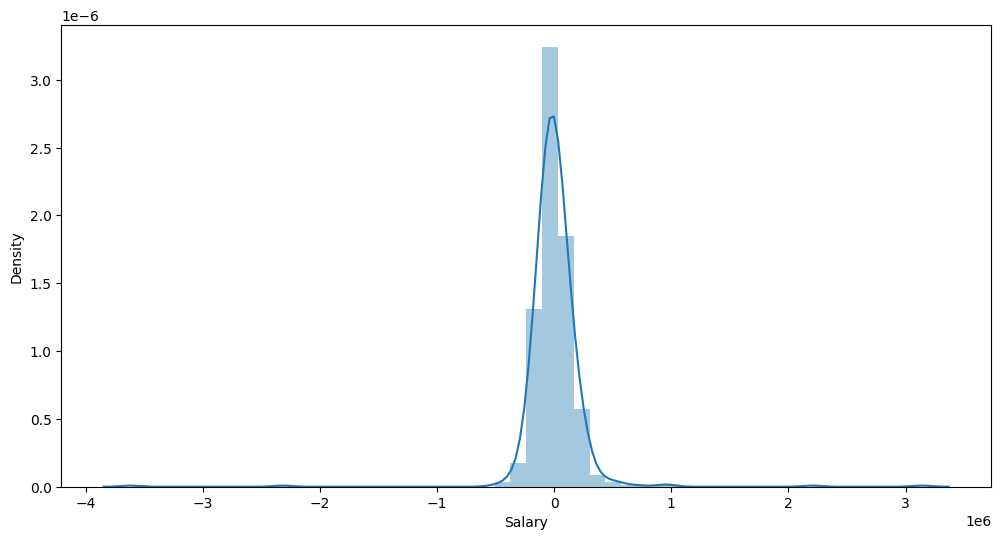

In [44]:
plt.figure(figsize = (12,6))
sns.distplot(diff)

In [45]:
xgb_r2_score = xgb_reg.score(X_test, y_test)

print("XGBoost R2 Score: ", (xgb_r2_score))

XGBoost R2 Score:  -0.48580079780730623


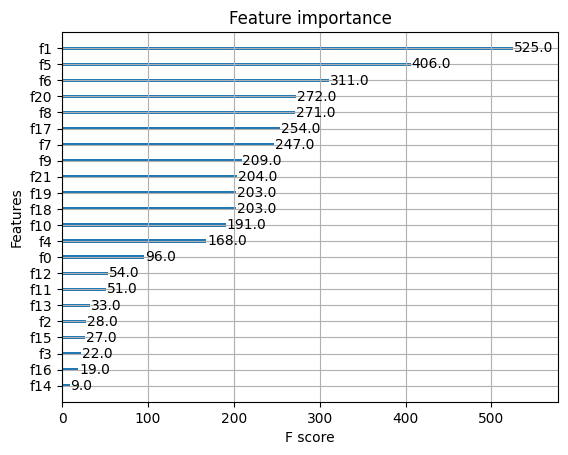

In [46]:
# Plot feature importance
xgb.plot_importance(xgb_reg)
plt.show()